
# Exploracion de datos

Comenzamos importando las librerías de carga de datos y de visualización.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as mtick

Luego definiremos los tipos de las variables y ademas se cargaran los datos


In [2]:
# Leer los datos y establecer los tipos de datos para cada columna basado en la información del pdf
dtypes = {'Vlo-I': str, 'Ori-I': str, 'Des-I': str, 'Emp-I': str,
          'Vlo-O': str, 'Ori-O': str, 'Des-O': str, 'Emp-O': str,
          'DIA': int, 'MES': int, 'AÑO': int, 'DIANOM': str, 'TIPOVUELO': str,
          'OPERA': str, 'SIGLAORI': str, 'SIGLADES': str}
df = pd.read_csv('../data/dataset_SCL.csv', dtype=dtypes, parse_dates=['Fecha-I', 'Fecha-O'])


Comenzamos buscando, irregularidades en los datos, identificamos que Vlo-O tiene valores nulos, por lo que se procede a eliminarlos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  object        
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [4]:
df.nunique()

Fecha-I      53252
Vlo-I          584
Ori-I            1
Des-I           64
Emp-I           30
Fecha-O      62774
Vlo-O          861
Ori-O            1
Des-O           63
Emp-O           32
DIA             31
MES             12
AÑO              2
DIANOM           7
TIPOVUELO        2
OPERA           23
SIGLAORI         1
SIGLADES        62
dtype: int64

In [5]:
df.dropna(inplace=True)

A continuación, crearemos nuevas columnas derivadas de las originales.

In [6]:
# Crear una nueva columna para temporada alta
df['Temporada alta'] = ((df['Fecha-I'].between('2017-12-15', '2018-03-03')) |
                     (df['Fecha-I'].between('2017-07-15', '2017-07-31')) |
                     (df['Fecha-I'].between('2017-09-11', '2017-09-30'))).astype(int)

# Calcular el retraso en minutos
df['Diferencia en minutos'] = (df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60

# Crear una nueva columna para retraso menor
df['Atraso menor'] = ((df['Diferencia en minutos'] > 0) & (df['Diferencia en minutos'] < 15)).astype(int)

# Crear una nueva columna para periodo del día
df['Periodo día'] = pd.cut(pd.to_datetime(df['Fecha-I']).dt.hour,
                           bins=[-1, 5, 12, 19, 24],
                           labels=['noche', 'mañana', 'tarde', 'noche'],
                           include_lowest=True,
                           ordered=False).astype(str)

# Exportar el nuevo DataFrame a un archivo CSV
df.to_csv('../data/synthetic_features.csv', index=False)

#### Ahora describiremos las variables, sin contar variables no generadas en el paso anterior.
##### Asociadas a la programacion dada por las aerolinias. (-I)
Comenzamos con la Fecha y hora programada del vuelo.<br>
Donde podemos ver el rango de fechas que estamos trabajando

In [54]:
print(df['Fecha-I'].describe())

count                            68205
mean     2017-07-05 12:14:56.933362688
min                2017-01-01 00:15:00
25%                2017-03-31 12:45:00
50%                2017-07-10 05:30:00
75%                2017-10-08 11:20:00
max                2017-12-31 23:55:00
Name: Fecha-I, dtype: object


Ahora vemos el Número de vuelo programado

In [8]:
df['Vlo-I'].describe()

count     68205
unique      584
top         174
freq        686
Name: Vlo-I, dtype: object

Ahora el Código de ciudad de origen programado, donde podemos ver que hay solo un valor para esta variable

In [9]:
df['Ori-I'].describe()

count     68205
unique        1
top        SCEL
freq      68205
Name: Ori-I, dtype: object

Ahora el Código de ciudad de destino programado.

In [10]:
df['Des-I'].describe()

count     68205
unique       64
top        SCFA
freq       5787
Name: Des-I, dtype: object

Código aerolínea de vuelo programado.

In [11]:
df['Emp-I'].describe()

count     68205
unique       30
top         LAN
freq      37611
Name: Emp-I, dtype: object

##### Asociadas a la programacion dada por la operacion. (-O)
Al analizar la fecha operacional, podemos ver de inmediato el retraso en los vuelos, ya que la programacion solo incluia 2017

In [12]:
df['Fecha-O'].describe()

count                            68205
mean     2017-07-05 12:24:03.590059264
min                2017-01-01 00:04:00
25%                2017-03-31 12:58:00
50%                2017-07-10 05:39:00
75%                2017-10-08 11:22:00
max                2018-01-01 00:12:00
Name: Fecha-O, dtype: object

Numero de vuelo programado

In [13]:
df['Vlo-O'].describe()

count     68205
unique      861
top         174
freq        649
Name: Vlo-O, dtype: object

Al igual que su contraparte programada solo hay un valor (SCEL) para esta variable

In [14]:
df['Ori-O'].describe()

count     68205
unique        1
top        SCEL
freq      68205
Name: Ori-O, dtype: object

Código de ciudad de destino de operación

In [15]:
df['Des-O'].describe()

count     68205
unique       63
top        SCFA
freq       5786
Name: Des-O, dtype: object

Código aerolínea de vuelo operado.

In [16]:
df['Emp-O'].describe()

count     68205
unique       32
top         LAN
freq      20988
Name: Emp-O, dtype: object

Día del mes de operación del vuelo.

In [17]:
df['DIA'].describe()

count    68205.000000
mean        15.714742
std          8.782941
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: DIA, dtype: float64

Mes de operación del vuelo.

In [18]:
df['MES'].describe()

count    68205.000000
mean         6.622667
std          3.523281
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: MES, dtype: float64

Año de operación del vuelo.

In [19]:
df['AÑO'].describe()

count    68205.000000
mean      2017.000029
std          0.005415
min       2017.000000
25%       2017.000000
50%       2017.000000
75%       2017.000000
max       2018.000000
Name: AÑO, dtype: float64

Dia de la semana de operación del vuelo.

In [20]:
df['DIANOM'].describe()

count       68205
unique          7
top       Viernes
freq        10292
Name: DIANOM, dtype: object

Tipos de vuelo.

In [21]:
df['TIPOVUELO'].describe()

count     68205
unique        2
top           N
freq      36966
Name: TIPOVUELO, dtype: object

Aerolinea operadora.

In [22]:
df['OPERA'].describe()

count           68205
unique             23
top       Grupo LATAM
freq            40892
Name: OPERA, dtype: object

Ciudad de origen.

In [23]:
df['SIGLAORI'].describe()

count        68205
unique           1
top       Santiago
freq         68205
Name: SIGLAORI, dtype: object

Ciudad de destino

In [24]:
df['SIGLADES'].describe()

count            68205
unique              62
top       Buenos Aires
freq              6335
Name: SIGLADES, dtype: object

Antes de continuar con la exploracion de datos, se procede a analizar las discrepancias entre los datos programados y operados.<br>
Para esto vamos a comparar los datos de codigo de vuelo programado y operado.

      Vlo-I  Vlo-O
6018   4501   1001
6020   4501   1001
6022   4501   1003
6023   4501   1001
6025   4501   1001
...     ...    ...
68201   400  400.0
68202   400  400.0
68203   400  400.0
68204   400  400.0
68205   400  400.0

[4518 rows x 2 columns]
Número de valores únicos para los códigos de número de vuelo:
4518

Número de valores iguales para los códigos de número de vuelo:
63687


Text(0.5, 1.0, 'Comparación entre códigos coincidentes y no coincidentes para Vlo-I y Vlo-O')

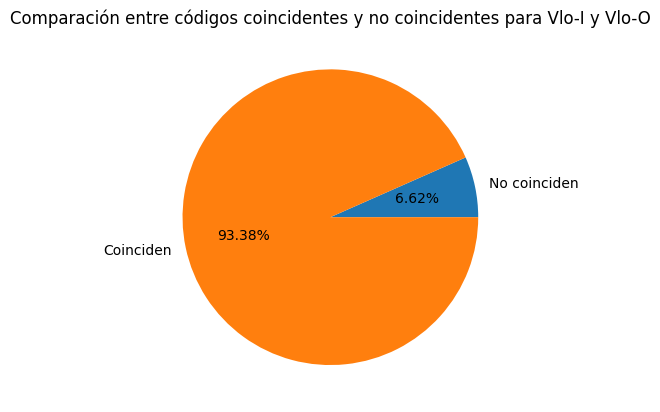

In [25]:
df_vlo = df[['Vlo-I', 'Vlo-O']]

df_vlo_unique = df_vlo[df_vlo['Vlo-I'] != df_vlo['Vlo-O']]
df_vlo_equal = df_vlo[df_vlo['Vlo-I'] == df_vlo['Vlo-O']]
num_unique_vlo = df_vlo_unique.shape[0]
num_equal_vlo = df_vlo_equal.shape[0]

print(df_vlo_unique)
print('Número de valores únicos para los códigos de número de vuelo:\n{}\n\nNúmero de valores iguales para los códigos de número de vuelo:\n{}'.format(num_unique_vlo, num_equal_vlo))

comp_vlo = [num_unique_vlo, num_equal_vlo]
plt.pie(comp_vlo, labels=['No coinciden', 'Coinciden'], autopct='%1.2f%%')
plt.title('Comparación entre códigos coincidentes y no coincidentes para Vlo-I y Vlo-O')


Basado en este analisis, podemos ver que hay una discrepancia en el formato de los datos, por lo que se procede a eliminar el punto decimal.

Número de valores únicos para los códigos de número de vuelo:
120

Número de valores iguales para los códigos de número de vuelo:
68085


Text(0.5, 1.0, 'Comparación entre códigos coincidentes y no coincidentes para Vlo-I y Vlo-O')

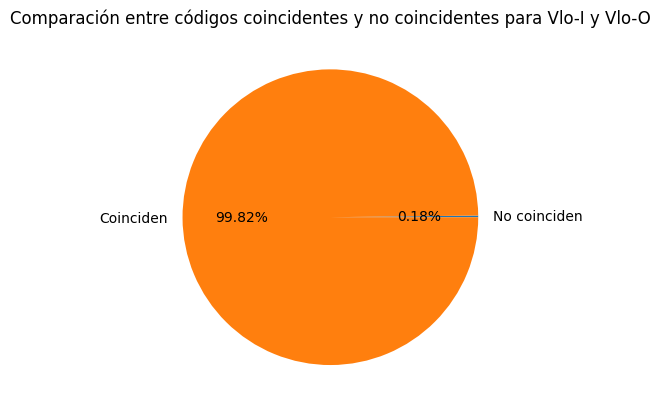

In [26]:
df_vlo = df[['Vlo-I', 'Vlo-O']].apply(pd.to_numeric, errors='coerce')

df_vlo_unique = df_vlo[df_vlo['Vlo-I'] != df_vlo['Vlo-O']]
df_vlo_equal = df_vlo[df_vlo['Vlo-I'] == df_vlo['Vlo-O']]
num_unique_vlo = df_vlo_unique.shape[0]
num_equal_vlo = df_vlo_equal.shape[0]

print('Número de valores únicos para los códigos de número de vuelo:\n{}\n\nNúmero de valores iguales para los códigos de número de vuelo:\n{}'.format(num_unique_vlo, num_equal_vlo))

comp_vlo = [num_unique_vlo, num_equal_vlo]
plt.pie(comp_vlo, labels=['No coinciden', 'Coinciden'], autopct='%1.2f%%')
plt.title('Comparación entre códigos coincidentes y no coincidentes para Vlo-I y Vlo-O')


En vista a que la diferencia entre los datos se daba debido a un punto decimal, se procedera a __asumir__ que Vlo-I y Vlo-O son iguales, desde este momento.<br>
Ahora veremos la distribucion de vuelos entre nacional e internacional.


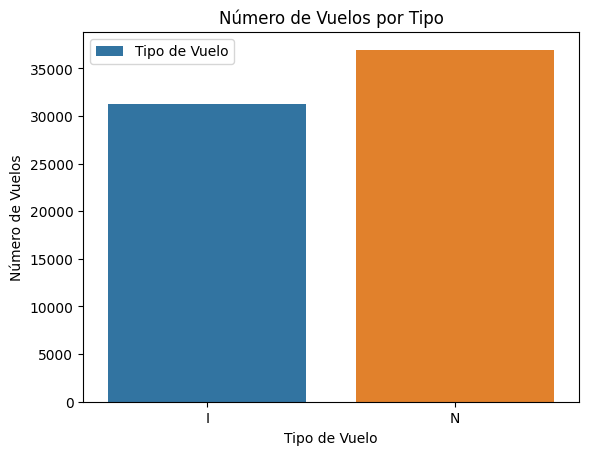

In [27]:
sns.countplot(x='TIPOVUELO', data=df)
plt.xlabel('Tipo de Vuelo')
plt.ylabel('Número de Vuelos')
plt.title('Número de Vuelos por Tipo')
plt.legend(['Tipo de Vuelo'])

Ahora veremos los destinos segun SIGLADES, programa y operacion.

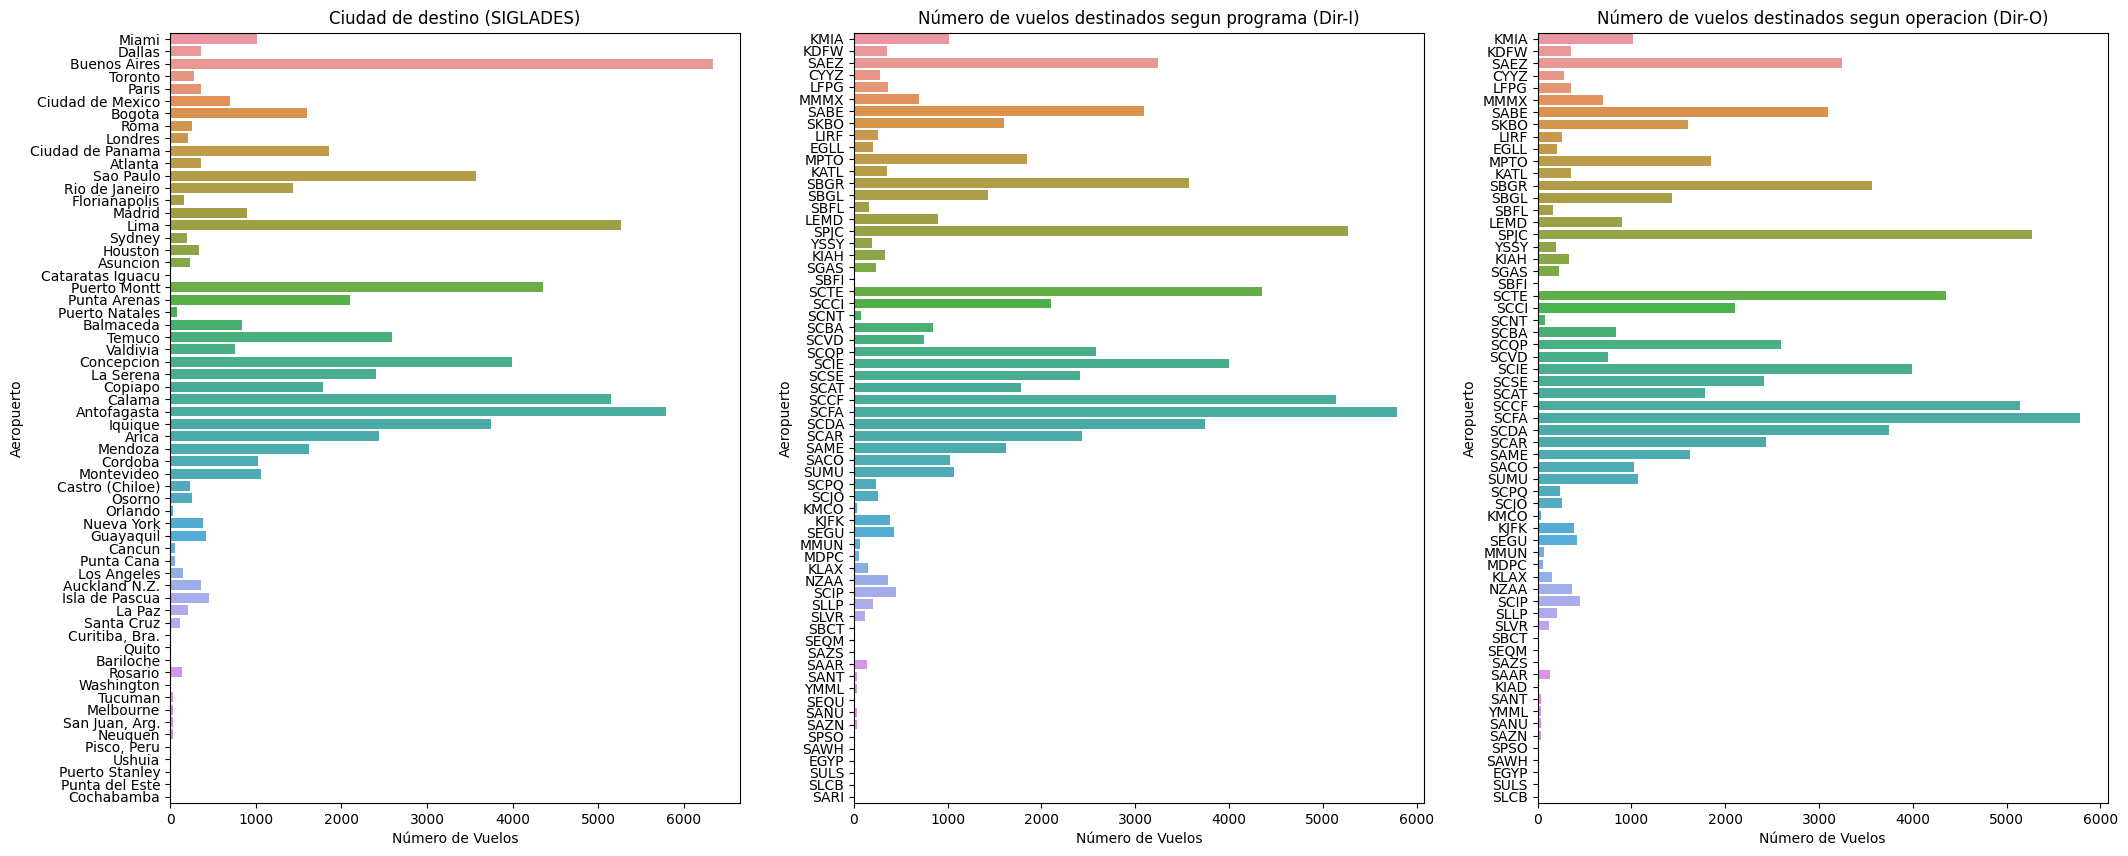

In [28]:
plt.figure(figsize=(25,10))
plt.subplot(1, 3, 1)
sns.countplot(y='SIGLADES', data=df)
plt.ylabel('Aeropuerto')
plt.xlabel('Número de Vuelos')
plt.title('Ciudad de destino (SIGLADES)')
plt.subplot(1, 3, 2)
sns.countplot(y='Des-I', data=df)
plt.ylabel('Aeropuerto')
plt.xlabel('Número de Vuelos')
plt.title('Número de vuelos destinados segun programa (Dir-I)')
plt.subplot(1, 3, 3)
sns.countplot(y='Des-O', data=df)
plt.ylabel('Aeropuerto')
plt.xlabel('Número de Vuelos')
plt.title('Número de vuelos destinados segun operacion (Dir-O)')
plt.show()

A priori se ve que las distribuciones son iguales o muy similares, pero se procedera a analizarlos de forma mas detallada.

Número de valores únicos para los códigos de destino:
28

Número de valores iguales para los códigos de destino:
68177


Text(0.5, 1.0, 'Comparación entre códigos coincidentes y no coincidentes para Des-I y Des-O')

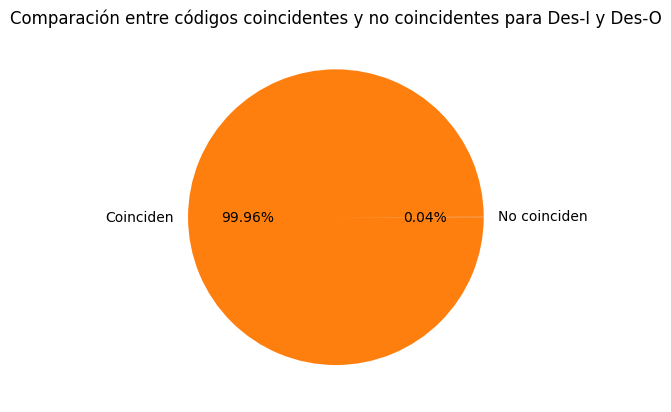

In [29]:
df_des = df[['Des-I', 'Des-O']]
df_des_unique = df_des[df_des['Des-I'] != df_des['Des-O']]
df_des_equal = df_des[df_des['Des-I'] == df_des['Des-O']]
num_unique_des = df_des_unique.shape[0]
num_equal_des = df_des_equal.shape[0]

print('Número de valores únicos para los códigos de destino:\n{}\n\nNúmero de valores iguales para los códigos de destino:\n{}'.format(num_unique_des, num_equal_des))

comp_des = [num_unique_des, num_equal_des]
plt.pie(comp_des, labels=['No coinciden', 'Coinciden'], autopct='%1.2f%%')
plt.title('Comparación entre códigos coincidentes y no coincidentes para Des-I y Des-O')


Dado que en un 99.96% del tiempo Des-I y Des-O coinciden desde este momento se __asumira__ que son iguales.<br>
Procederemos a hacer un metodo similar para comparar el nombre de la aerolinea (Emp-I y Emp-O)

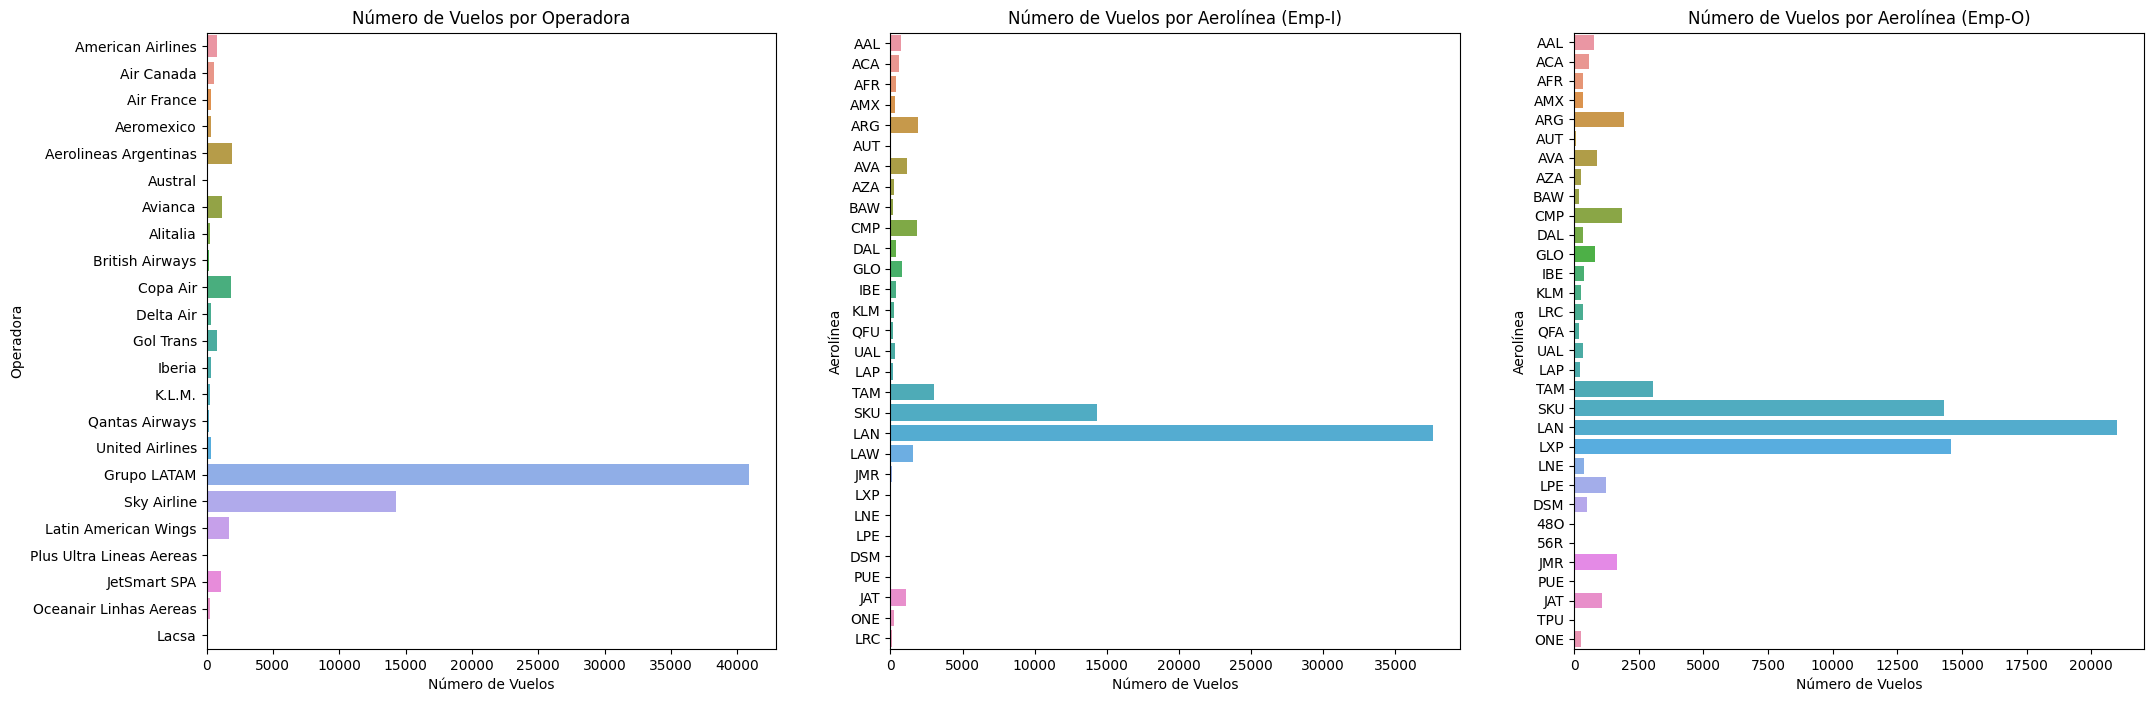

In [30]:

plt.figure(figsize=(25,8))
plt.subplot(1, 3, 1)
sns.countplot(y='OPERA', data=df)
plt.ylabel('Operadora')
plt.xlabel('Número de Vuelos')
plt.title('Número de Vuelos por Operadora')
plt.subplot(1, 3, 2)
sns.countplot(y='Emp-I', data=df)
plt.ylabel('Aerolínea')
plt.xlabel('Número de Vuelos')
plt.title('Número de Vuelos por Aerolínea (Emp-I)')
plt.subplot(1, 3, 3)
sns.countplot(y='Emp-O', data=df)
plt.ylabel('Aerolínea')
plt.xlabel('Número de Vuelos')
plt.title('Número de Vuelos por Aerolínea (Emp-O)')
plt.show()


Como vemos, hay una discrepancia en los datos, por lo que se procede a analizarlos.

Number of Unique values for airline codes:
Emp-I    18668
Emp-O    18668
dtype: int64

Number of equal values for airline codes: 
Emp-I    49537
Emp-O    49537
dtype: int64


Text(0.5, 1.0, 'Comparison between matched and unmatched codes for Emp-I and Emp-O')

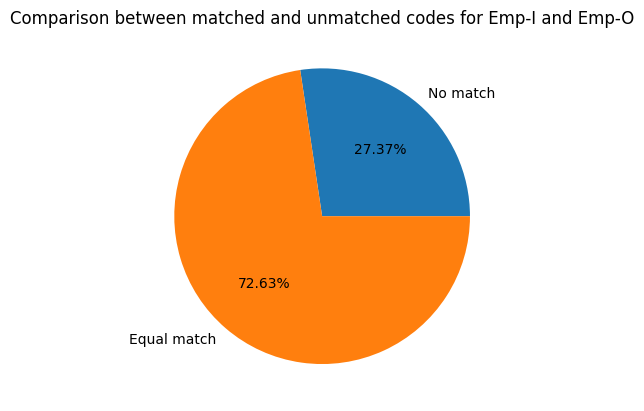

In [31]:
df_emp = df[['Emp-I', 'Emp-O']]
df_emp_unique = df_emp[df_emp['Emp-I'] != df_emp['Emp-O']]
df_emp_equal = df_emp[df_emp['Emp-I'] == df_emp['Emp-O']]
unique_emp = df_emp_unique.count()
equal_emp = df_emp_equal.count()
print('Number of Unique values for airline codes:\n{}\n\nNumber of equal values for airline codes: \n{}'.format(unique_emp, equal_emp))

comp_emp = [unique_emp['Emp-I'], equal_emp['Emp-I']]
plt.pie(comp_emp, labels=['No match', 'Equal match'], autopct='%1.2f%%')
plt.title('Comparison between matched and unmatched codes for Emp-I and Emp-O')


In [32]:
df_emp_unique

,Emp-I,Emp-O
345,AUT,ARG
814,AVA,LRC
815,AVA,LRC
816,AVA,LRC
817,AVA,LRC
...,...,...
67877,LAW,JMR
67878,LAW,JMR
67879,LAW,JMR
67880,LAW,JMR


Como se puede observar, hay una diferencia importante entre Emp-I y Emp-O, por lo que NO se asumiran iguales.<br>
Ahora analizare la hora de salida programada contra la de operacion.

Text(0.5, 1.0, 'Fecha programada vs Fecha de operación')

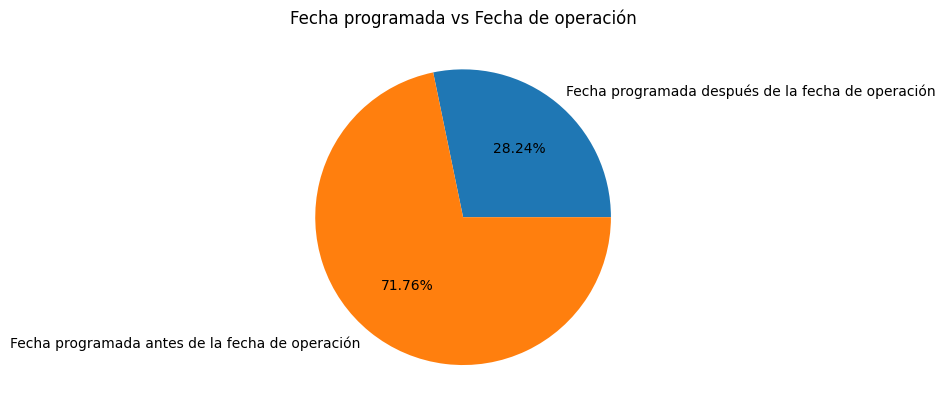

In [33]:
date_i = pd.to_datetime(df['Fecha-I'], format='%Y-%m-%d %H:%M:%S')
date_o = pd.to_datetime(df['Fecha-O'], format='%Y-%m-%d %H:%M:%S')

ahead_sched = (date_i > date_o).sum()
norm_sched = (date_i < date_o).sum()

plt.pie([ahead_sched, norm_sched], labels=['Fecha programada después de la fecha de operación', 'Fecha programada antes de la fecha de operación'], autopct='%1.2f%%')
plt.title('Fecha programada vs Fecha de operación')


Al analizar los tiempos de salida podemos ver que existen tiempos de operacion previos a la programacion, por lo que desde este punto __asumiremos__ que los vuelos pueden operar antes de lo programado.<br>

Ahora analizaremos los datos del año 2018, ya que son unicos en su condicion.


In [34]:
df_date = df[df['AÑO']==2018]
df_date[['AÑO', 'MES', 'DIA', 'Fecha-O']]

,AÑO,MES,DIA,Fecha-O
66918,2018,1,1,2018-01-01 00:02:00
66947,2018,1,1,2018-01-01 00:12:00


Estos vuelos son complejos por lo que se procedera a analizarlos de forma mas detallada mas adelante. Por ahora nos confirman que Fecha-O y año, mes y dia son iguales.<br>
Ahora analizaremos los datos de los vuelos por dia de la semana, mes del año y dia del mes.

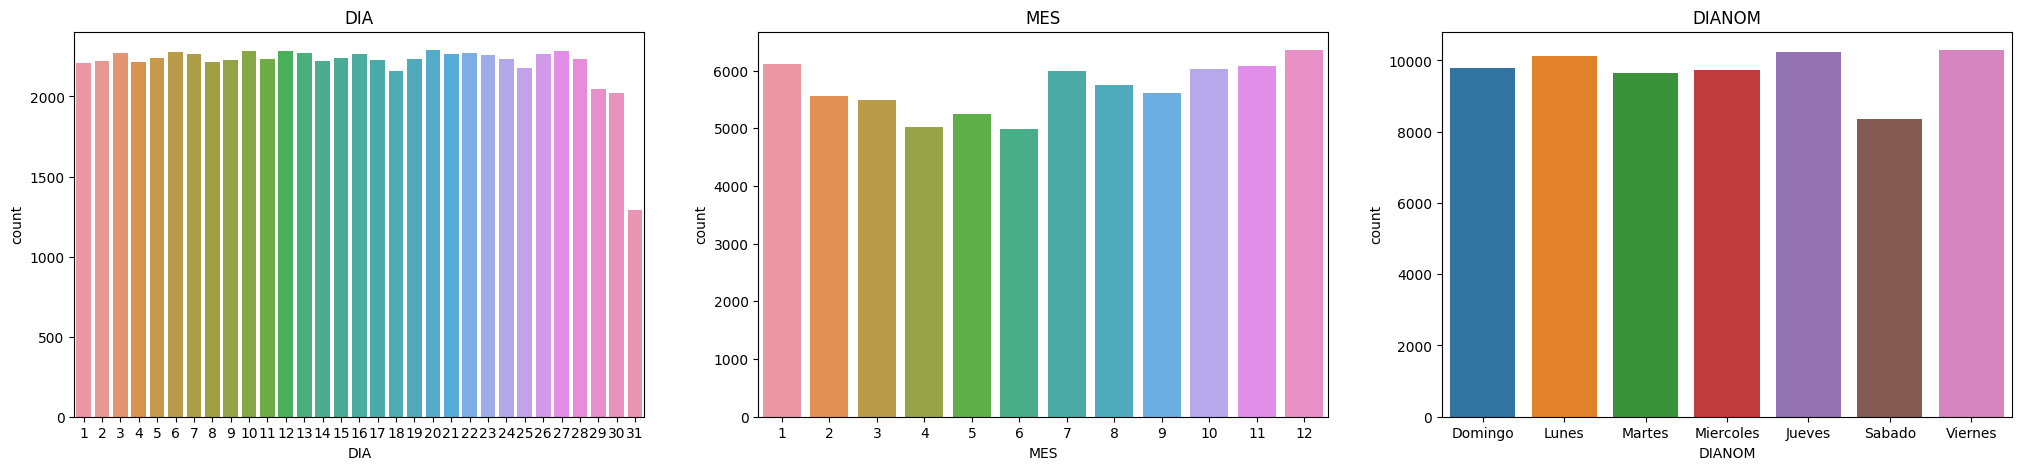

In [35]:
cols = ['DIA', 'MES', 'DIANOM']
fig, axes = plt.subplots(1, len(cols), figsize=(25,5))

for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title('{}'.format(col))
    
plt.show()

Observaciones:
- Los vuelos estan distribuidos de forma uniforme durante el mes, a excepcion de fin de mes donde hay menos vuelos.
- Hay menos vuelos entre abril y junio.
- Hay menos vuelos los sabados.

## Ahora trabajaremos principalmente con los datos de la diferencia en minutos

Ahora graficamos la canitdad de vuelos atrasados vs no atrasados

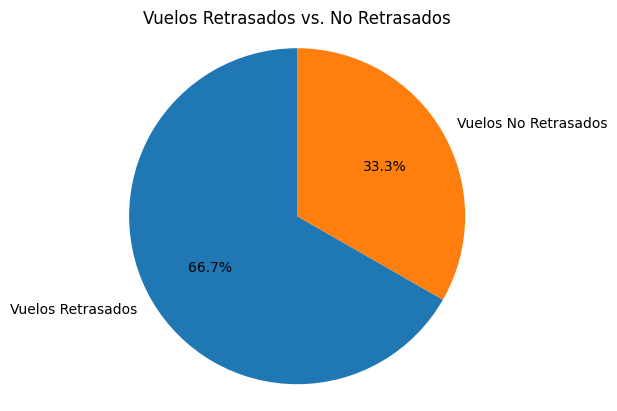

In [36]:
# Graficar la longitud de vuelos retrasados vs. no retrasados
vuelos_retrasados = df[df['Diferencia en minutos'] > 0]
longitud_vuelos_retrasados = vuelos_retrasados.shape[0]
longitud_vuelos_no_retrasados = df.shape[0] - longitud_vuelos_retrasados
etiquetas = ['Vuelos Retrasados', 'Vuelos No Retrasados']
tamaños = [longitud_vuelos_retrasados, longitud_vuelos_no_retrasados]
fig, ax = plt.subplots()
ax.pie(tamaños, labels=etiquetas, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Vuelos Retrasados vs. No Retrasados')
plt.show()


Se puede observar que hay un desbalance entre los vuelos retrasados y no retrasados, lo cual influira en utilizar tecnicas de balancemiento de datos.

Ahora para facilitar el resto de los analisis, se procede a crear una columna que indique si el vuelo esta atrasado o no, la llamare Label ya que a futuro se convertira en el indicador de la clase.

In [37]:
df['Label'] = (df['Diferencia en minutos'] > 0).astype(int)

En este caso, se tomaran los Atrasos menores como un atraso, se explicara a fondo dentro del readme, pero se __asumira__ para este analisis. <br>

Ahora analizaremos la distribucion de los vuelos atrasados por dia del mes, mes del año y dia de la semana. Ademas,por tipo de vuelo, temporada y periodo del dia.


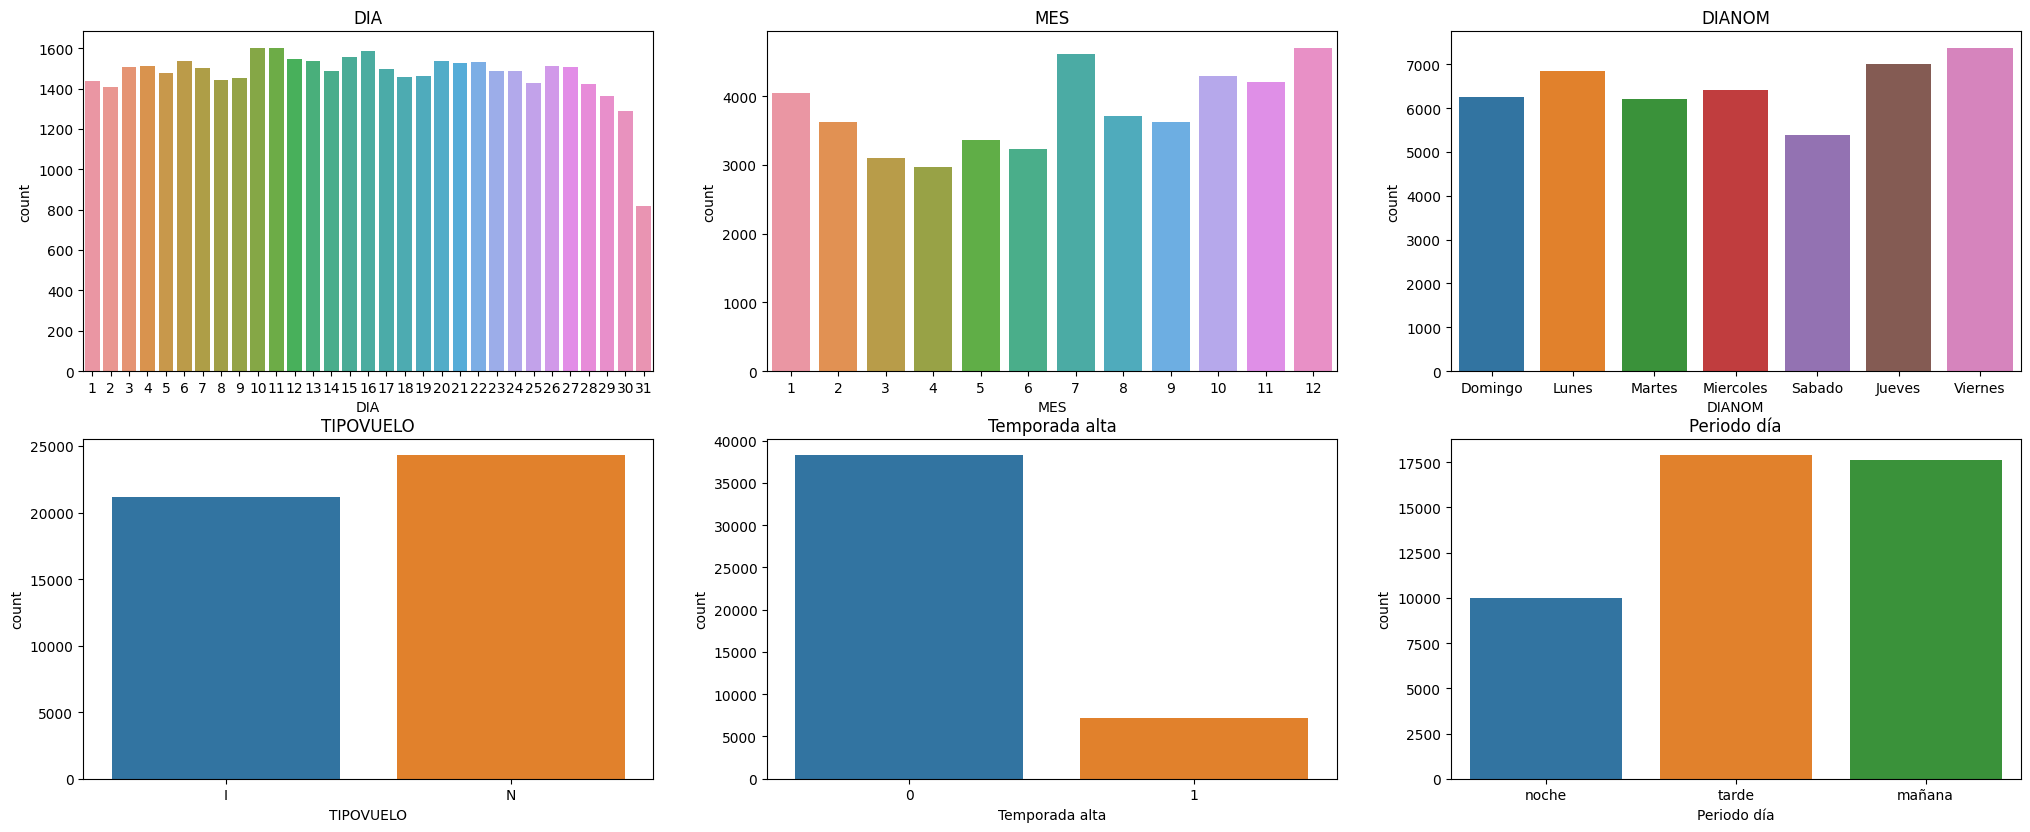

In [38]:


delay = df[['DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'Emp-I', 'Emp-O', 'Des-I', 'Des-O', 'OPERA', 'SIGLADES', 'Temporada alta', 'Periodo día']][df['Label']==1]
day_month_period = ['DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'Temporada alta', 'Periodo día']
plt.figure(figsize=(25,15))

for i, col in enumerate(day_month_period):
    ax = plt.subplot(3, int(len(day_month_period)/2), i+1)
    sns.countplot(x=col, data=delay)
    ax.set_title('{}'.format(col))



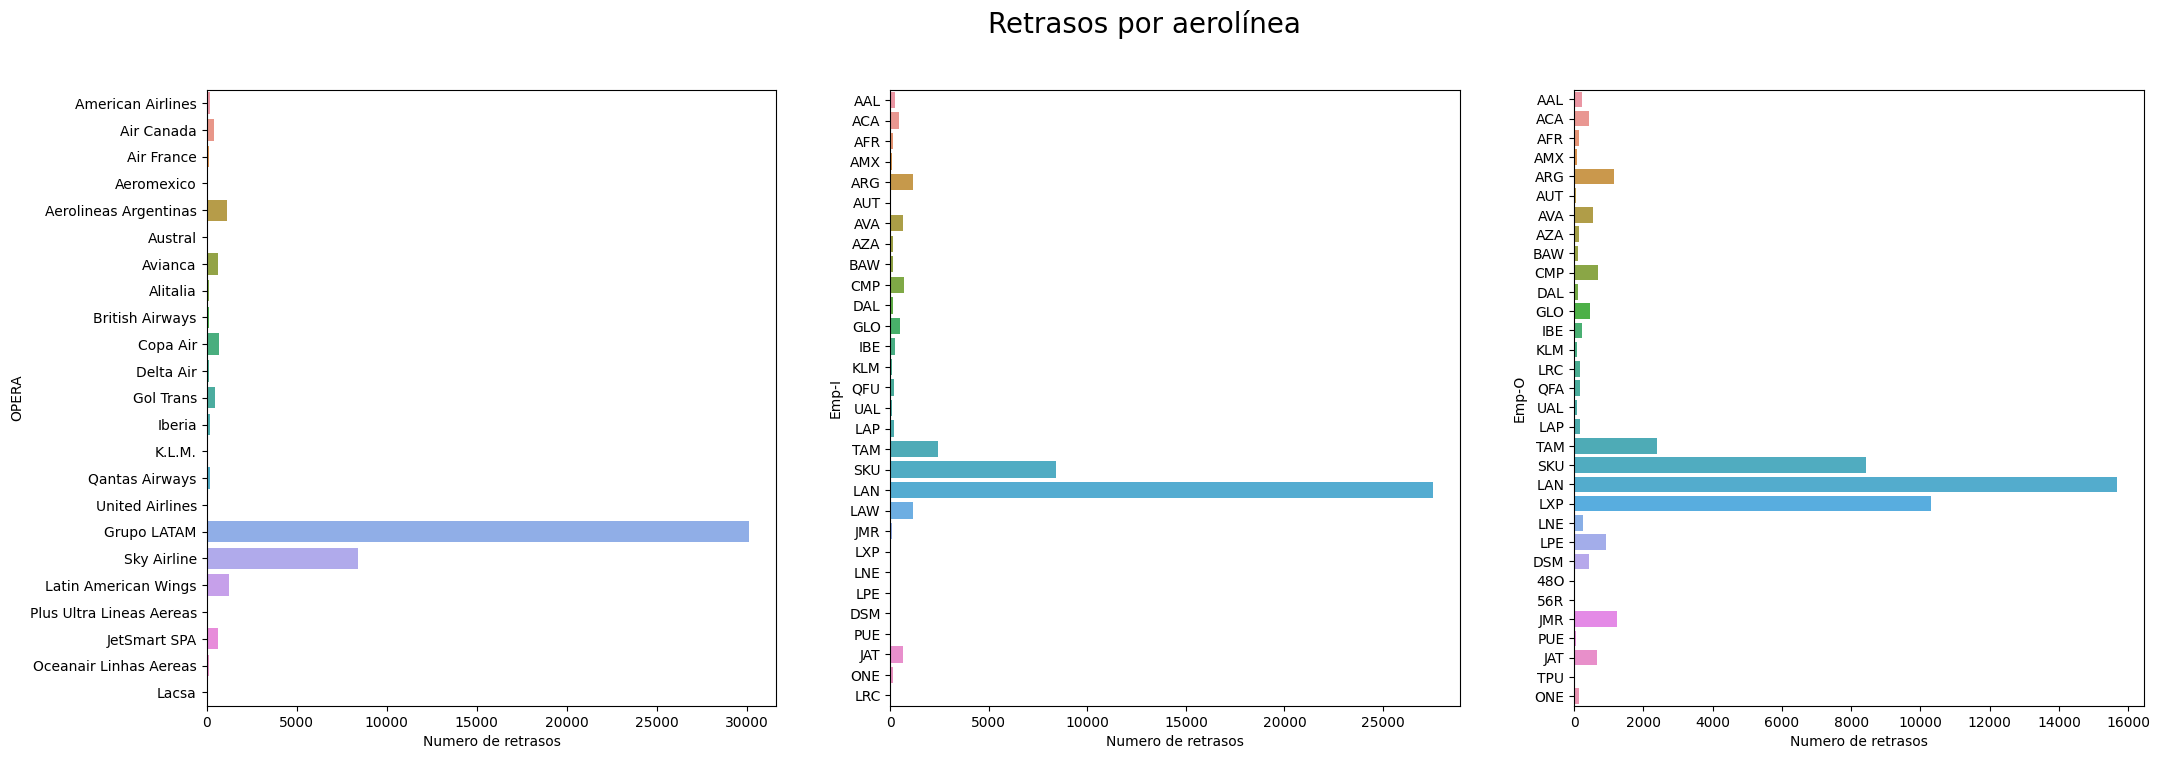

In [39]:
plt.figure(figsize=(25,8))
plt.suptitle("Retrasos por aerolínea", fontsize=20)
plt.subplot(1, 3, 1)
sns.countplot(y='OPERA', data=delay)
plt.xlabel('Numero de retrasos')
plt.subplot(1, 3, 2)
sns.countplot(y='Emp-I', data=delay)
plt.xlabel('Numero de retrasos')
plt.subplot(1, 3, 3)
sns.countplot(y='Emp-O', data=delay)
plt.xlabel('Numero de retrasos')
plt.show()

Tambien analizamos la proporcion de vuelos retrasados por dia del mes:

Graficamos la longitud de vuelos retrasados vs. no retrasados:

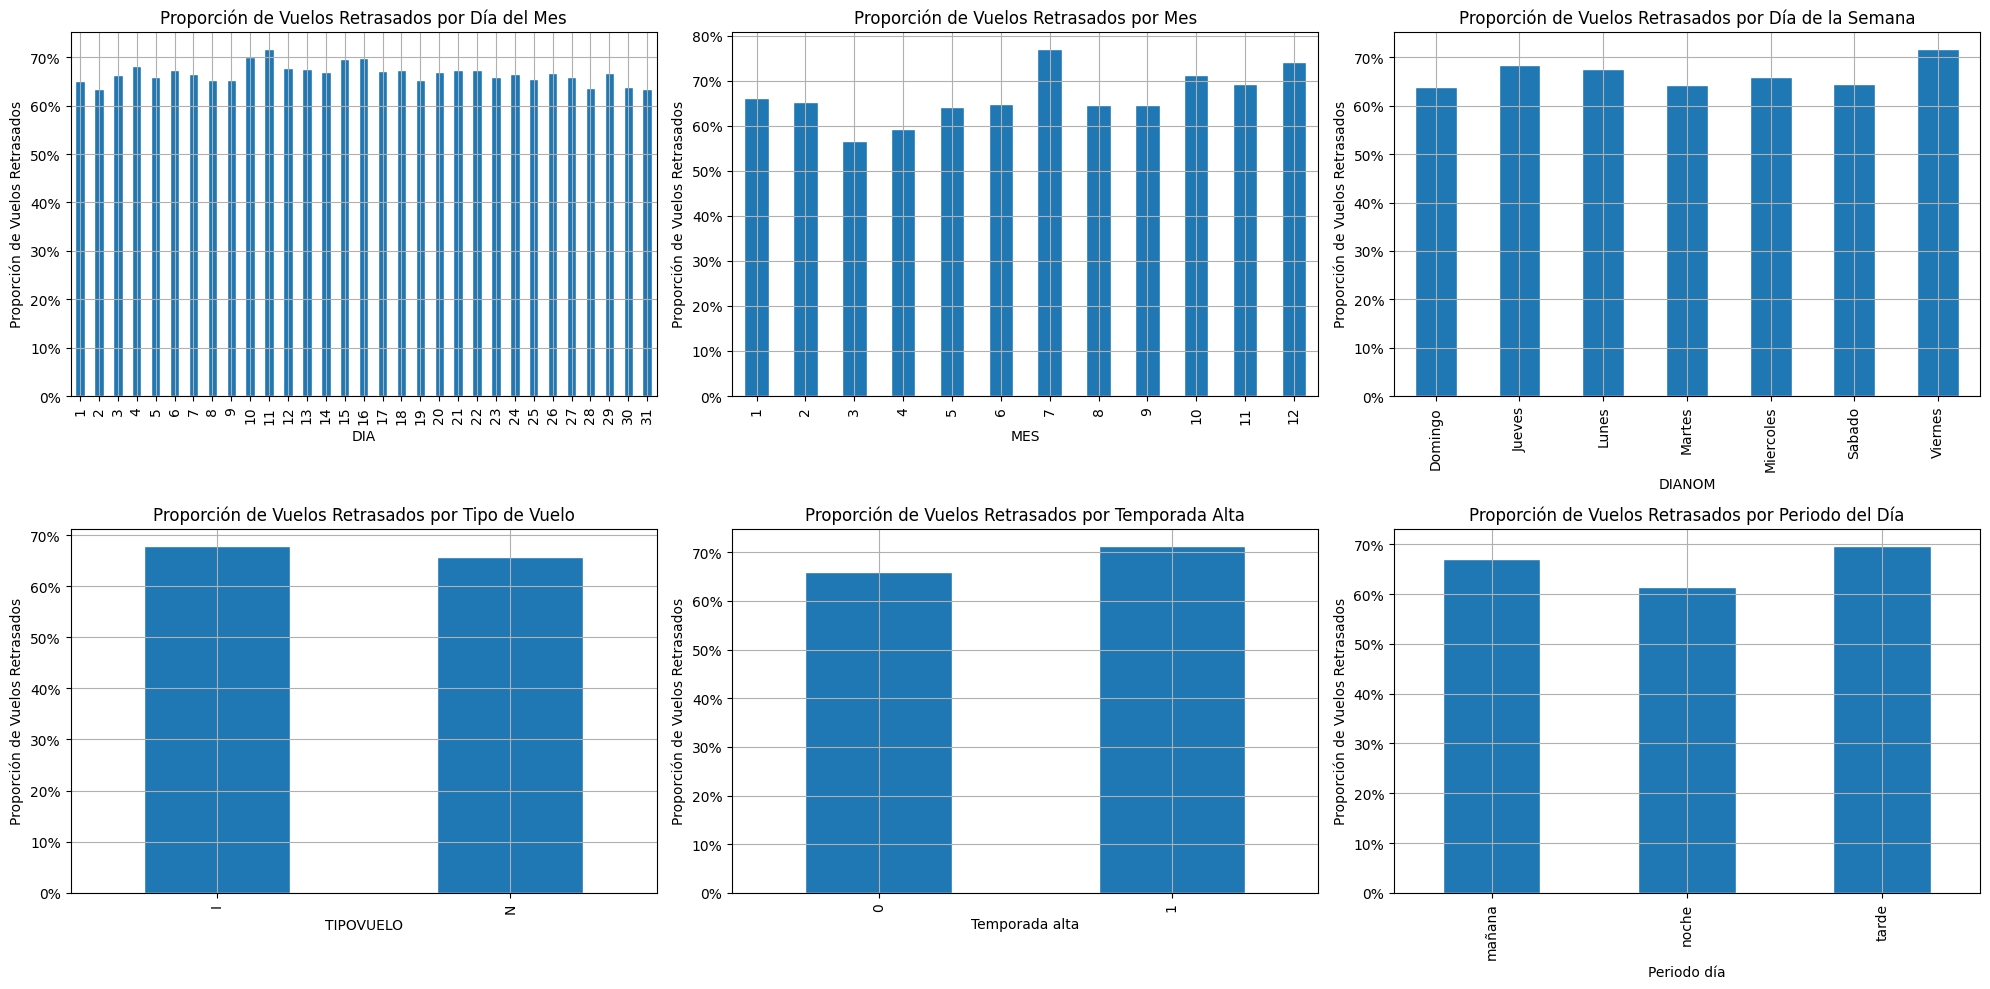

In [40]:
def plot_proportions(df, column, title, ax):
    # Calculate the total number of flights per day or month
    total_flights = df.groupby(column)['Label'].count()

    # Calculate the total number of delayed flights (Label == 1) per day or month
    delayed_flights = df[df['Label'] == 1].groupby(column)['Label'].count()

    # Calculate the proportion of delayed flights over the total for each day or month
    proportions = delayed_flights / total_flights * 100

    # Create a bar plot of the proportions
    sns.set_style('whitegrid')
    ax = proportions.plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Proporción de Vuelos Retrasados')
    ax.set_title(title)

    # Set y axis to percentage
    fmt = '%.0f%%'
    yticks = mtick.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

# Plot proportion per day of the month
plot_proportions(df, 'DIA', 'Proporción de Vuelos Retrasados por Día del Mes', axs[0, 0])

# Plot proportion per month
plot_proportions(df, 'MES', 'Proporción de Vuelos Retrasados por Mes', axs[0, 1])

# Plot proportion per 'DIANOM'
plot_proportions(df, 'DIANOM', 'Proporción de Vuelos Retrasados por Día de la Semana', axs[0, 2])

# Plot proportion per 'TIPOVUELO'
plot_proportions(df, 'TIPOVUELO', 'Proporción de Vuelos Retrasados por Tipo de Vuelo', axs[1, 0])

# Plot proportion per 'Temporada alta'
plot_proportions(df, 'Temporada alta', 'Proporción de Vuelos Retrasados por Temporada Alta', axs[1, 1])

# Plot proportion per 'Periodo día'
plot_proportions(df, 'Periodo día', 'Proporción de Vuelos Retrasados por Periodo del Día', axs[1, 2])

plt.tight_layout()
plt.show()

Agrupamos los datos por "Codigo de aerolinia" y calculamos el número de vuelos retrasados y no retrasados para cada grupo:

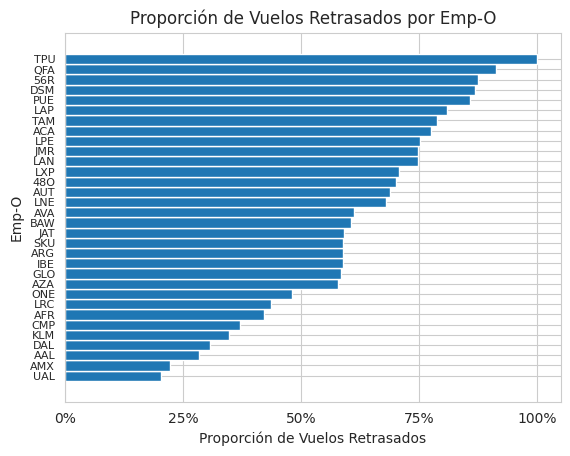

In [51]:
grouped = df.groupby('Emp-O')['Diferencia en minutos'].agg(['count', 'sum'])

# Calculamos el número de vuelos retrasados para cada grupo
grouped['num_delayed'] = (df['Diferencia en minutos'] > 0).groupby(df['Emp-O']).sum()

# Calculamos la proporción de vuelos retrasados vs. no retrasados para cada grupo
grouped['prop_delayed'] = grouped['num_delayed'] / grouped['count']

# Ordenamos los grupos por la proporción de vuelos retrasados vs. no retrasados
grouped = grouped.sort_values('prop_delayed')

# Graficamos los grupos ordenados usando un gráfico de barras horizontal
ax = plt.gca()
ax.barh(grouped.index, grouped['prop_delayed'], height=1)
ax.set_title('Proporción de Vuelos Retrasados por Emp-O')
ax.set_xlabel('Proporción de Vuelos Retrasados')
ax.set_ylabel('Emp-O')
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.grid(True)

# Ajustamos los ticks y el límite del eje y para aumentar el espacio entre las barras
ax.set_yticks(grouped.index)
ax.set_yticklabels(grouped.index, fontsize=8)
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)
plt.show()